In [67]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
print(torch.cuda.is_available())

False


In [68]:
from sim import Sim

env = Sim()

In [69]:
from dqn_agent import Agent

agent = Agent(state_size=2, seed=0)

agent.load()

-23.923290032485717


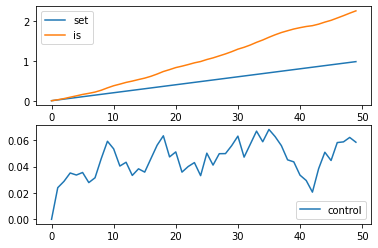

In [70]:
# watch an untrained agent
state = env.reset()
for j in range(env.T_MAX):
    action = agent.act(state,eps=1.0)
    env.render()
    state, reward, done = env.step(action)
    if done:
        break 
print(reward)
env.close()

-0.37804446647913503


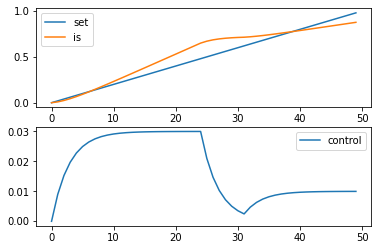

In [71]:
# watch an untrained agent
state = env.reset()
for j in range(env.T_MAX):
    action = agent.act(state)
    env.render()
    state, reward, done = env.step(action)
    if done:
        break 
print(reward)
env.close()

Episode 100	Average Score: -0.69
Episode 200	Average Score: -0.59
Episode 300	Average Score: -0.61
Episode 400	Average Score: -0.57
Episode 500	Average Score: -0.50
Episode 600	Average Score: -0.50
Episode 700	Average Score: -0.45
Episode 800	Average Score: -0.50
Episode 900	Average Score: -0.43
Episode 1000	Average Score: -0.41
Episode 1100	Average Score: -0.39
Episode 1200	Average Score: -0.41
Episode 1300	Average Score: -0.41
Episode 1400	Average Score: -0.40
Episode 1500	Average Score: -0.37
Episode 1600	Average Score: -0.37
Episode 1700	Average Score: -0.40
Episode 1800	Average Score: -0.37
Episode 1900	Average Score: -0.47
Episode 2000	Average Score: -0.36
Episode 2100	Average Score: -0.36
Episode 2200	Average Score: -0.33
Episode 2300	Average Score: -0.35
Episode 2400	Average Score: -0.36
Episode 2500	Average Score: -0.35
Episode 2600	Average Score: -0.35
Episode 2700	Average Score: -0.56
Episode 2800	Average Score: -2.94
Episode 2900	Average Score: -0.93
Episode 3000	Average Sc

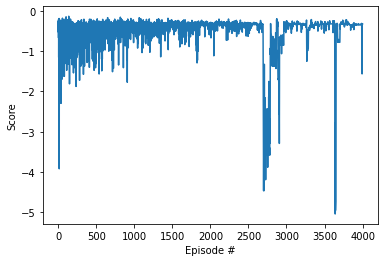

In [72]:
def dqn(n_episodes=4000, max_t=env.T_MAX, eps_start=0.1, eps_end=0.0000000001, eps_decay=0.999):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

scores = dqn()

agent.save()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

-0.3291541170437346


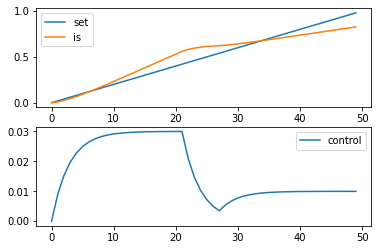

In [73]:
state = env.reset()
for j in range(env.T_MAX):
    action = agent.act(state)
    env.render()
    state, reward, done = env.step(action)
    if done:
        break 
print(reward)
env.close()